<a href="https://colab.research.google.com/github/Baldros/Supervisioned-Learning/blob/main/SKlearnRegression(Estudo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    A ideia desse notebook é estudar sobre técnicas de regressão
    utilizando a biblioteca Scikit-Learn.

**Definição de Regressão**


```
  Regressão nada mais é do que um problema de
inferência sobre o dominio dos reais, ou seja,
a ideia é realizar uma predição sobre valores
numéricos contínuos.
```

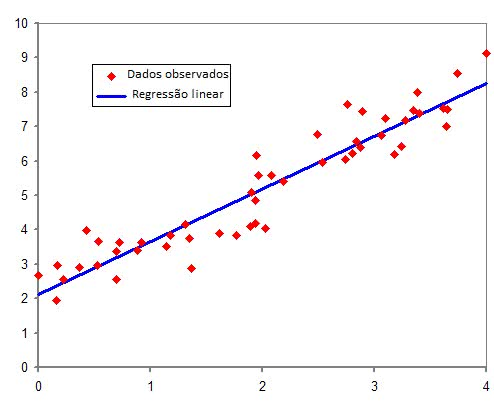

**Nota:**
```
  O que já foi tratado no notebook de estudo sobre
Classificação não será retomado nesse notebook.
```



# Importações:

In [ ]:
# Importações
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
# Checando os Datasets:
for name in dir(datasets):
  if "load" in name:
    print(name)

__loader__
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


# Análise Exploratória:
    Nesse caso em particular, vamos usar a Análise Exploratória
    para encontrar o melhor dataset para o estudo da Regressão Linear.
    Lembre-se que para ser um caso de Regressão, precisamos que a variável
    alvo seja contínua.

In [ ]:
# Escolhendo o dataset:
diabetes = datasets.load_diabetes()

In [ ]:
print(type(diabetes))
print(diabetes.data.shape)
for key in diabetes.keys():
  print(key)
print(type(diabetes.data),type(diabetes.target))

<class 'sklearn.utils._bunch.Bunch'>
(442, 10)
data
target
frame
DESCR
feature_names
data_filename
target_filename
data_module
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Construindo o Dataframe:
alvo = pd.DataFrame(diabetes['target'], columns=['alvo'])
dados = pd.DataFrame(diabetes['data'], columns=diabetes.feature_names)
df = pd.concat([dados,alvo],axis=1);df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,alvo
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  alvo    442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB



**Escolha do Dataset**
```
  Note que no dataset diabetes a variável alvo
é contínua, ou seja, é o nosso dataset escolhido para
o estudo.
```

## Escolhendo a variável preditora:

    Antes de prosseguirmos para a regressão propriamente dita
    precisamos definir variável preditora, ou seja, o nosso X.

    Já que estamos trabalhando com uma Regressão Linear, a forma
    que eu vou adotar para escolher a nossa variável preditora será
    pela análise da correlação.

**Explicação Teorica**

    O calculo de correlação entre duas variáveis nasce da desigualdade
    de Cauchy-Schwarz, que garante que:

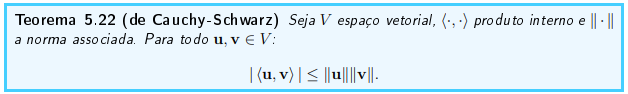

    De modo que:
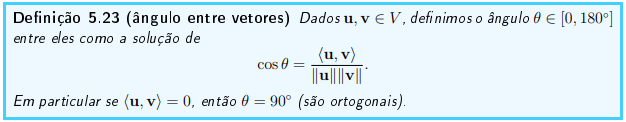

    Ou seja, a correlação nada mais é do que o cosseno do angulo entre
    os dois vetores, por isso a correlação é um valor entre zero e 1.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

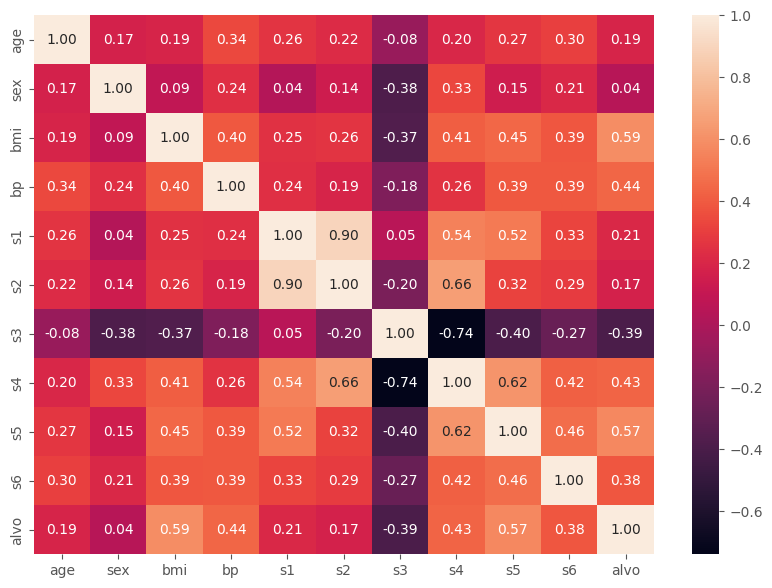

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()



```
  Como pelo gráfico de heatmap fica dificil identificar
a variável com maior correlação com a variável alvo, abaixo
encontra-se um código que ira achar isso para nós. Mais
especificamente, irá achar as 10 maiores correlações com uma
respectiva variável alvo.
```





In [ ]:
# Obtendo a variável com correlação mais alta:
target_correlations = df.corr()['alvo'].sort_values(ascending=False)[1:10]
target_correlations # Printei uma lista para ver os nomes

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: alvo, dtype: float64



```
  Deste modo, vemos que a nossa variável preditora
é a variável "bmi", agora sim podemos partir para
a regressão.

  Porem, note que não teve nenhuma grande correlação,
o que pode nos indicar que a regressão linear não
seja a melhor opção.
```



# Regressão Linear:

    Existem uma vasta gama de tipos de regressões possiveis,
    a regressão que trabalharemos aqui é a linear.

**Definição de Regressão Linear**


```
A ideia da regressão linear nasce da ideia de função afim y=ax+b, onde:

1.   y = f(x), ou seja, a variável alvo;
2.   x é a variável que descreve a variável alvo;
3.   a e b são constantes, parâmetros do modelo.

É encontrar um a e b que operados com x, chegue no
valor mais próximo de y, para cada par ordenado (x,y).
```

**Regressão Linear em dimensões superiores**

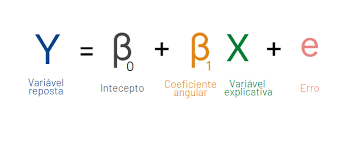



**Função de Perda**


```
  A função de perda é a forma com que defini-se
os parâmetros constantes da regressão linear.
```

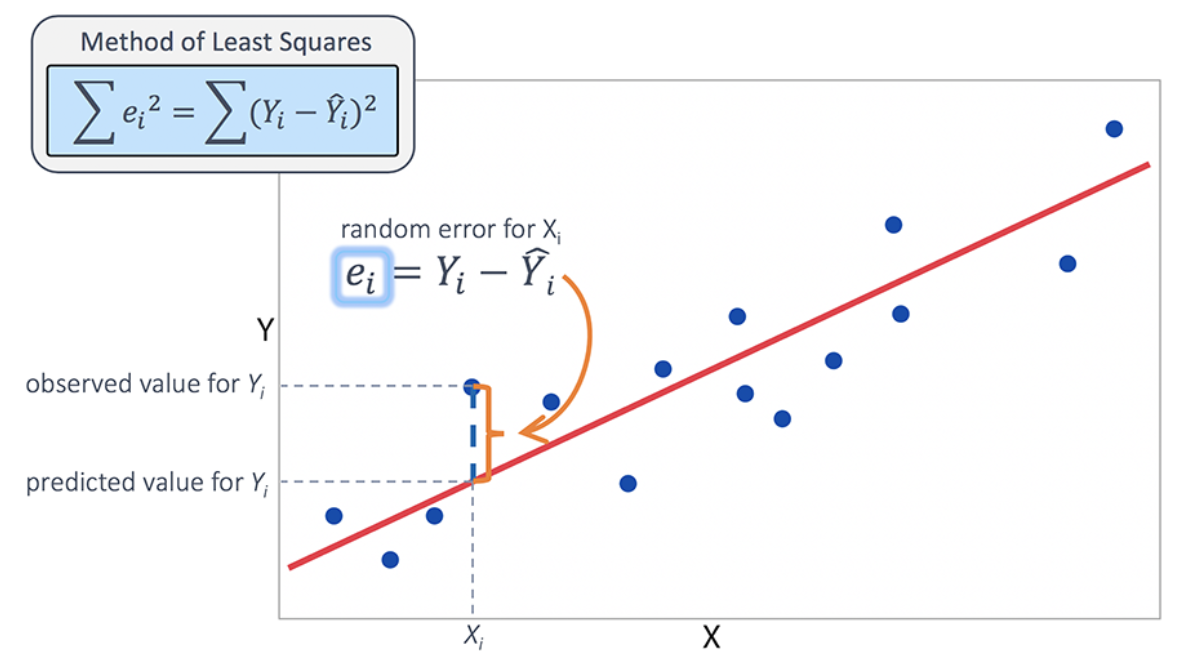




In [ ]:
# Importações:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Separando as variáveis que serão utilizadas:
X = df.bmi.values.reshape(-1, 1)
y = df.alvo.values

print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (442, 1)
<class 'numpy.ndarray'> (442,)




```
  Esse reshape é necessário para
o funcionamento adequado do modelo.
```



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                    random_state=42)

In [ ]:
# Construindo o modelo quanto a um objeto:
reg = LinearRegression()

# Treinando o modelo:
reg.fit(X_train,y_train)

# Predizendo a variável:
y_pred = reg.predict(X_test);y_pred[:10]

array([144.90793957, 187.52115034, 147.03860011, 202.4357741 ,
       131.05864608, 126.797325  , 319.6221037 , 196.04379249,
        61.81217859, 166.21454495])

# Mensuração do Modelo:
    Vamos analisar agora a qualidade do modelo, tanto por métrica
    quanto por visualizações.

In [ ]:
# Checando a precisão do modelo:
acuracia = round(reg.score(X_test,y_test),4)*100 # Passando para porcentagem
print(f'A precisão do modelo é de {acuracia}%')

A precisão do modelo é de 28.03%


In [ ]:
# Erro Quadrático Médio:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

62.32926055201547

## Testando todas as features:

In [ ]:
X = df.drop("alvo",axis=1).values
y = df.alvo.values

print(type(X), X.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (442, 10)
<class 'numpy.ndarray'> (442,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                    random_state=42)

In [ ]:
# Construindo o modelo quanto a um objeto:
reg = LinearRegression()

# Treinando o modelo:
reg.fit(X_train,y_train)

# Predizendo a variável:
y_pred = reg.predict(X_test);y_pred[:10]

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992])

In [ ]:
# Checando a precisão do modelo:
acuracia = round(reg.score(X_test,y_test),4)*100 # Passando para porcentagem
print(f'A precisão do modelo é de {acuracia}%')

A precisão do modelo é de 47.73%


In [ ]:
# Erro Quadrático Médio:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

53.120156070942706


**Conclusão**
```
  Poderiamos pensar em formas de melhoras predição
fazendo um ajuste de hiperparâmetros, ou até mesmo
mudando o modelo de regressão.
```

```
  De fato, esse é um problema da regressão linear,
ainda que seja uma metodologia simples, as vezes ele
não é a melhor alternativa.
```





## Analise Visual:

    Um jeito de se analisar a qualidade do modelo é através
    de visualizações que nos mostre o comportamento da predição.



1.   Gráfico 1:


```
  A ideia do gráfico é demonstrar o quanto a predição
acompanha o comportamento dos dados reais.
```


2.   Gráfico de 45°:


```
  Uma outra forma de comparar a qualidade do modelo, quanto mais
em cima da linha os pontos ficarem, melhor é o modelo.
```





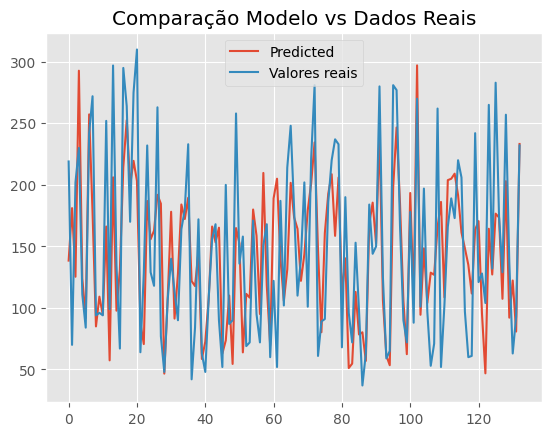

In [ ]:
# Gráfico de
plt.title('Comparação Modelo vs Dados Reais')
plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Valores reais')
plt.legend()
plt.show()

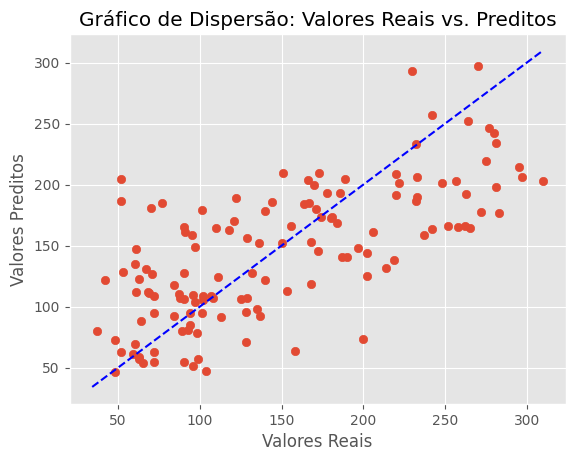

In [ ]:
# Comparação da qualidade do Modelo:
plt.scatter(y_test, y_pred)
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim(), '--', color='blue')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Dispersão: Valores Reais vs. Preditos')
plt.show()

**Conclusão**


```
  Vemos que a qualidade da predição
não ficou nada boa.
```



# Cross validation (Validação Cruazada):

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
kf = KFold(n_splits=6, shuffle = True, random_state=42);kf

KFold(n_splits=6, random_state=42, shuffle=True)

In [ ]:
cv_results = cross_val_score(reg,X,y,cv=5);cv_results

array([0.42955615, 0.52259939, 0.48268054, 0.42649776, 0.55024834])

In [ ]:
print(np.mean(cv_results), np.std(cv_results))

0.48231643590864215 0.04926857751190387


In [ ]:
print(np.quantile(cv_results, [.025,.975]))

[0.4268036  0.54748344]




```
Continua uma merda
```



# Regularizações:

## Regularização Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

0.48031838456367226

## Regularização Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
scores = []
for alpha in [0.01,1,10,20,50]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test,y_test))
print(scores)

[0.47871428812904404, 0.36189802861957876, -0.006405449804164132, -0.006405449804164132, -0.006405449804164132]


In [ ]:
X = df.drop("alvo", axis=1).values
y = df.alvo.values

names = df.drop("alvo", axis=1).columns

In [ ]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X_train,y_train).coef_

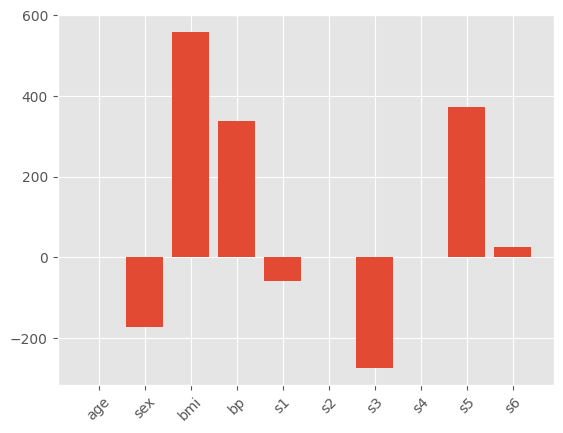

In [ ]:
plt.bar(names,lasso_coef)
plt.xticks(rotation=45)
plt.show()